In [1]:
import pandas as pd

In [2]:
def fromXLSXtoDF(sheetNames_param, xlsxData_param):
    allDF = []
    for i in sheetNames_param:
        # print the sheet name (not necessary)
        print(i)
        # so read each sheet named "i", and just the first two columns 0 and 1
        df = pd.read_excel(xlsxData_param, sheet_name=i, usecols=[0, 1])
        # set the timestamp to the index
        df = df.set_index("Timestamp")
        # add the dataframe to the list of dataframes
        allDF.append(df)
    # concatenate across rows (axis=1), use the index as key)
    result = pd.concat(allDF, axis=1, join='outer')
    # change names of columns to the sheetnames
    result.columns = sheetNames
    return(result)

In [3]:
sheetNames = ["Soybean", "Soymeal", "Soyoil", "Corn", "DalianSBM", "DalianSBO", "BRL", "CNY"]
sheetNames = ["Soybean"]
xlsxData = "../../data/raw/Price Correlation.xlsx"
df = fromXLSXtoDF(sheetNames, xlsxData)
df.head(5)

Soybean


,Soybean
Timestamp,
2020-06-24,874.50
2020-06-23,874.00
2020-06-22,879.25
2020-06-19,880.75
2020-06-18,876.00


In [4]:
allDFsPerc = []
df2 = df.iloc[::-1].pct_change(1)
allDFsPerc.append(df2[::-1])

df2 = df.iloc[::-1].pct_change(4)
allDFsPerc.append(df2[::-1])

df2 = df.iloc[::-1].pct_change(22)
allDFsPerc.append(df2[::-1])

percentChange = pd.concat(allDFsPerc, axis=1, join='inner')
percentChange.columns = ['% Move', 'W%mv', 'Mth%mv']
percentChange.head(5)

,% Move,W%mv,Mth%mv
Timestamp,,,
2020-06-24,0.000572,-0.001712,0.036137
2020-06-23,-0.005971,-0.002852,0.033402
2020-06-22,-0.001703,0.007159,0.025364
2020-06-19,0.005422,0.005422,0.032230
2020-06-18,-0.000570,-0.004263,0.023663


In [5]:
allDFsAbs = []
df2 = df.iloc[::-1].diff(4)
df2[::-1]
allDFsAbs.append(df2[::-1])

df2 = df.iloc[::-1].diff(22)
allDFsAbs.append(df2[::-1])

absChange = pd.concat(allDFsAbs, axis=1, join='inner')
absChange.columns = ['Wmv', 'Mthmv']
absChange.head(5)

,Wmv,Mthmv
Timestamp,,
2020-06-24,-1.50,30.50
2020-06-23,-2.50,28.25
2020-06-22,6.25,21.75
2020-06-19,4.75,27.50
2020-06-18,-3.75,20.25


In [6]:
travisDFSoybean = pd.concat([df, percentChange, absChange], axis=1, join="inner")
#order the columns
travisDFSoybean = travisDFSoybean[['Soybean', '% Move', 'Wmv', 'W%mv', 'Mthmv', 'Mth%mv']] 
travisDFSoybean.to_csv('travisDFSoybean.csv', index = False)
travisDFSoybean.head(5)

,Soybean,% Move,Wmv,W%mv,Mthmv,Mth%mv
Timestamp,,,,,,
2020-06-24,874.50,0.000572,-1.50,-0.001712,30.50,0.036137
2020-06-23,874.00,-0.005971,-2.50,-0.002852,28.25,0.033402
2020-06-22,879.25,-0.001703,6.25,0.007159,21.75,0.025364
2020-06-19,880.75,0.005422,4.75,0.005422,27.50,0.032230
2020-06-18,876.00,-0.000570,-3.75,-0.004263,20.25,0.023663


In [9]:
### Invert index
df = travisDFSoybean
df = df.reindex(index=df.index[::-1])
df

,Soybean,% Move,Wmv,W%mv,Mthmv,Mth%mv
Timestamp,,,,,,
2013-04-01,1108.00,NaN,NaN,NaN,NaN,NaN
2013-04-02,1111.25,0.002933,NaN,NaN,NaN,NaN
2013-04-03,1097.50,-0.012373,NaN,NaN,NaN,NaN
2013-04-04,1089.25,-0.007517,NaN,NaN,NaN,NaN
2013-04-05,1079.00,-0.009410,-29.00,-0.026173,NaN,NaN
...,...,...,...,...,...,...
2020-06-18,876.00,-0.000570,-3.75,-0.004263,20.25,0.023663
2020-06-19,880.75,0.005422,4.75,0.005422,27.50,0.032230
2020-06-22,879.25,-0.001703,6.25,0.007159,21.75,0.025364


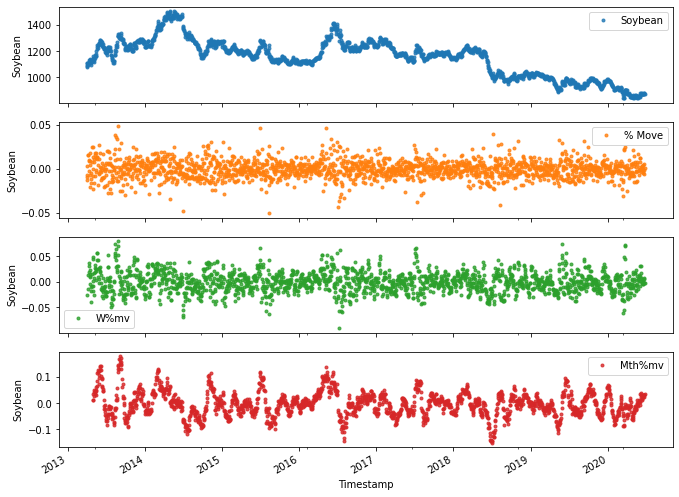

In [10]:

cols_plot = ['Soybean', '% Move', 'W%mv', 'Mth%mv']
axes = df[cols_plot].plot(marker='.', alpha=0.8, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes: 
    ax.set_ylabel('Soybean')

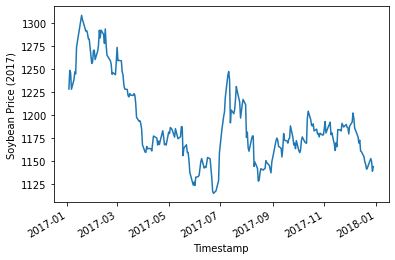

In [11]:
ax = df.loc['2017', 'Soybean'].plot()
ax.set_ylabel('Soybean Price (2017)');

In [12]:
df.index[df.index > '2017-01-02']

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24'],
              dtype='datetime64[ns]', name='Timestamp', length=876, freq=None)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Start and end of the date range to extract
data_columns = ["Soybean"]
df_weekly_mean = df[data_columns].resample('W').mean()


In [14]:
df.loc['2017-05':'2020-06', 'Soybean']
df.head()

,Soybean,% Move,Wmv,W%mv,Mthmv,Mth%mv
Timestamp,,,,,,
2013-04-01,1108.00,NaN,NaN,NaN,NaN,NaN
2013-04-02,1111.25,0.002933,NaN,NaN,NaN,NaN
2013-04-03,1097.50,-0.012373,NaN,NaN,NaN,NaN
2013-04-04,1089.25,-0.007517,NaN,NaN,NaN,NaN
2013-04-05,1079.00,-0.009410,-29.0,-0.026173,NaN,NaN


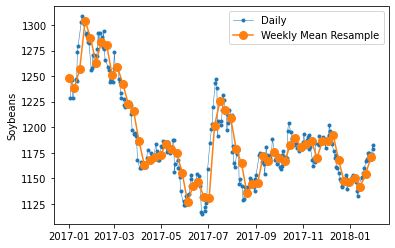

In [15]:
start, end = '2017-01', '2018-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Soybean'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean.loc[start:end, 'Soybean'],marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Soybeans')
ax.legend();
